# TCut Hello World

This will show you the simplest scripts to get data back from flat ROOT tuple files using `TCut` and `servicex` libraries.

`TCut` library supports `ROOT` `TCut` syntax to perform a selection on a flat ROOT TTree.

This tutorial assumes you have a properly configured `.servicex` file for an access to a ServiceX Uproot backend.

Test setup: `servicex==2.1.1` and `tcut-to-qastle==0.4`

In [2]:
from servicex import ServiceXDataset
import tcut_to_qastle as tcut

dataset_uproot = "user.kchoi:user.kchoi.ttHML_80fb_ttbar"
query = tcut.translate('nominal','lep_Pt_1','lep_Pt_1>1000')
sx_dataset = ServiceXDataset(dataset=dataset_uproot, backend_type='uproot')
data = sx_dataset.get_data_awkward(query)

In [3]:
data['lep_Pt_1']

<ChunkedArray [29697.21 59942.164 18633.768 ... 22894.816 28860.709 179207.53] at 0x7ff227226110>

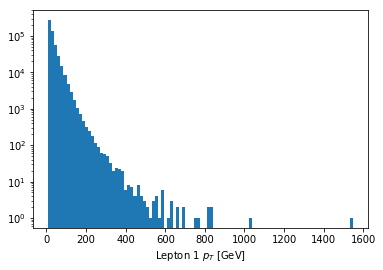

In [4]:
import matplotlib.pyplot as plt
plt.hist((data['lep_Pt_1']/1000.0).flatten(), bins=100)
plt.yscale('log')
plt.xlabel('Lepton 1 $p_T$ [GeV]')
plt.show()

### Line-by-line explination of the first cell

- Line 1: The ServiceX frontend library to communicate with a ServiceX backend. 
- Line 2: The library to translate `ROOT` `TCut` syntax into qastle syntax.
- Line 3: Blank line
- Line 4: This is the dataset that we will be reading from. This must be a `rucio` dataset identifier (DID). In this case we are working with an ATLAS backend, and this is a flat root file in a user scope.
- Line 5: Here you specify the name of input `TTree`, the list of branches (or columns) you want from the input `TTree`, and finally your selection (or filtering). 
- Line 6: Create `ServiceXDataset` with the dataset you want to process and the name of ServiceX backend type.
- Line 7: 
    - Now make a request to deliver what you specified in the query in a format of `awkward` array.
    - You can see two progress bars for the status of your request and downloading of outputs, respectively.

### Other cells

- The second cell simply shows the output from the request. A single column `lep_Pt_1` after the selection `lep_Pt_1 > 1000` is delivered.
- The third cell plots the output array as a histogram.